## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

### –ü–ª–∞–Ω —Å–µ–º–∏–Ω–∞—Ä–∞:

0) –û—Ç–≤–µ—Ç—ã –Ω–∞ –ª—é–±—ã–µ –≤–æ–ø—Ä–æ—Å—ã ü§∑ ¬Ø\\_(„ÉÑ)_/¬Ø

1) –û–±—É—á–∏–º —Å–≤–µ—Ä—Ç–æ—á–Ω—É—é —Å–µ—Ç—å –≤ –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ñ–∏–ª—å—Ç—Ä—ã —Å–≤—ë—Ä—Ç–æ–∫

1.5) –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∞ –µ—Å—Ç—å –ª–∏ —É –Ω–∞—Å –ø—Ä–æ–±–ª–µ–º—ã?

2) –î–æ–±–∞–≤–∏–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é

3) –£—Å–ª–æ–∂–Ω—è–µ–º –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É —Å–µ—Ç–∏ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞

In [1]:
import numpy as np 
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

%matplotlib inline

~~device = 'cuda'~~

~~torch.cuda.is_available()~~

~*–ö—Ä–∏–Ω–∂*. –¢–∞–∫ –ª—É—á—à–µ –Ω–µ –¥–µ–ª–∞—Ç—å) 

In [2]:
device = 'cuda'


# MyNet(): .....  model = MyNet(100, 100) -> model.to('cuda') # <- error if only CPU available

In [3]:
# –ù–µ –∫—Ä–∏–Ω–∂:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cuda')

In [5]:
!nvidia-smi

Thu Sep 30 11:47:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. –û–±—É—á–∞–µ–º —Å–≤—ë—Ä—Ç–æ—á–Ω—É—é —Å–µ—Ç—å –¥–ª—è –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

–°–µ–≥–æ–¥–Ω—è –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –¥–∞—Ç–∞—Å–µ—Ç–æ–º [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), –≤ –∫–æ—Ç–æ—Ä–æ–º —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è 10 –∫–ª–∞—Å—Å–æ–≤ —Ä–∞–∑–º–µ—Ä–æ–º 32 –Ω–∞ 32 –ø–∏–∫—Å–µ–ª—è —Å —Ç—Ä–µ–º—è –∫–∞–Ω–∞–ª–∞–º–∏. –í —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ 50000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –∞ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π 10000.

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # —Å—Ä–µ–¥–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ø–æ –∫–∞–Ω–∞–ª–∞–º

trainset = torchvision.datasets.CIFAR10(root='./cifar', train=True,
                                        download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./cifar', train=False,
                                       download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


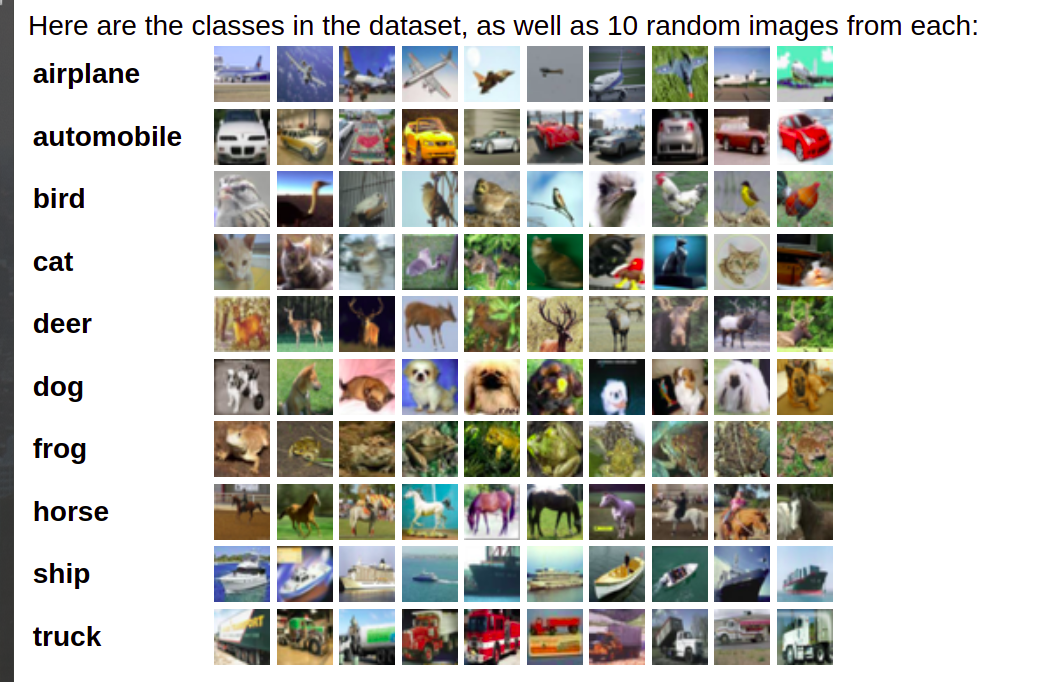

In [7]:
for batch in train_dataloader:
    sample, answer = batch
    print(sample.size(), answer.size())   # (bs, ch, h, w), (bs)
    break

torch.Size([16, 3, 32, 32]) torch.Size([16])


In [8]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

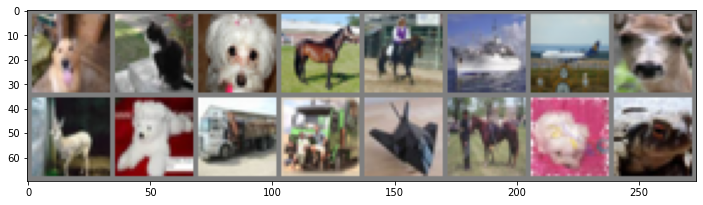

In [9]:
plt.figure(figsize=(12,12))

dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=False)

In [10]:
NUM_EPOCH = 25

In [11]:
import wandb
wandb.login()

wandb: Currently logged in as: kirili4ik (use `wandb login --relogin` to force relogin)


True

In [12]:
# We will use wandb to skip this frightening code:

import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

–í –∫–∞—á–µ—Å—Ç–≤–µ –±–µ–π–∑–ª–∞–π–Ω–∞ –≤–æ–∑—å–º–µ–º —Å–≤–µ—Ä—Ç–æ—á–Ω—É—é —Å–µ—Ç—å, —Å–æ—Å—Ç–æ—è—â—É—é –∏–∑ 1 VGG –±–ª–æ–∫–∞.

VGG –±–ª–æ–∫ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –¥–≤—É—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã—Ö —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö —Å–ª–æ–µ–≤ —Å –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å—é ReLU –º–µ–∂–¥—É –Ω–∏–º–∏, –∞ –∑–∞—Ç–µ–º max-pooling. –í VGG –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –º–∞–ª–µ–Ω—å–∫–∏–µ —Ñ–∏–ª—å—Ç—Ä—ã —Ä–∞–∑–º–µ—Ä–∞ 3x3 –∏ –ø–∞–¥–¥–∏–Ω–≥

### –í –∫–∞—á–µ—Å—Ç–≤–µ –±–µ–π–∑–ª–∞–π–Ω–∞ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ —Å–ª–µ–¥—É—é—â—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É:

1) VGG –±–ª–æ–∫ —Å 16 –∫–∞–Ω–∞–ª–∞–º–∏:
* —Å–≤—ë—Ä—Ç–æ—á–Ω—ã–π —Å–ª–æ–π —Å 16 –≤—ã—Ö–æ–¥–Ω—ã–º–∏ –∫–∞–Ω–∞–ª–∞–º–∏ –∏ —è–¥—Ä–æ–º 3x3 –∏ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å—é ReLU
* —Å–≤—ë—Ä—Ç–æ—á–Ω—ã–π —Å–ª–æ–π —Å 16 –≤—ã—Ö–æ–¥–Ω—ã–º–∏ –∫–∞–Ω–∞–ª–∞–º–∏ –∏ —è–¥—Ä–æ–º 5x5 –∏ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å—é ReLU
* Max pooling c —è–¥—Ä–æ–º 2x2 –∏ —à–∞–≥–æ–º 2

2) –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π —Å 128 –≤—ã—Ö–æ–¥–∞–º–∏ –∏ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç—å—é ReLU

3) –ü–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π —Å 10 –≤—ã—Ö–æ–¥–∞–º–∏ –∏ Softmax

In [13]:
# –†–∞–∑–º–µ—Ä linear1 –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –≤—Ö–æ–¥–Ω–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–∏:
# in_ch * out_ch ker * ker    # 32*32 –∏–ª–∏ 28*28 –∏–ª–∏ 256*256 

# GlobalAveragePool  # 32*32, 16ch -> 3*3, 100ch # 32*32 –Ω–∞ –≤—Ö–æ–¥, –Ω–æ –∏ 128*128 -> 10*10, 100ch  # 
# 256*256, 250*250 –∏–ª–∏ 270*270 

In [14]:
class ModelBaseline(nn.Module):
    def __init__(self, hidden=16):
        super(ModelBaseline, self).__init__()
        self.conv1   = nn.Conv2d(in_channels=3, out_channels=hidden,  kernel_size=(3,3), padding=3//2)
        self.conv2   = nn.Conv2d(in_channels=hidden, out_channels=hidden,  kernel_size=(5,5), padding=5//2)
        self.relu    = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, stride=2)  # (2,2)
        self.linear1 = nn.Linear(32*32*hidden//4, 128)
        self.linear2 = nn.Linear(128, 10)
        self.flatten = nn.Flatten()

        # Example:
        # self.layer_name = Layer(params)
        # ...
        # create 1 ReLU and 1 MaxPool layers and use them 2+ times in forward


    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        flattened = self.flatten(self.maxpool(x))
        x = self.relu(self.linear1(flattened))
        return self.linear2(x) 
        # no softmax to use CrossEntropyLoss later

In [15]:
model_baseline = ModelBaseline(hidden=16)

model_baseline.to(device)

ModelBaseline(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=4096, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [18]:
wandb.init(project="conv-sem03", name='baseline')
wandb.watch(model_baseline)

[]

## –ó–∞–¥–∞–Ω–∏–µ: –¥–æ–ø–∏—à–∏—Ç–µ —Ü–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è

## 1.5. –ü–µ—Ä–µ–¥ –∑–∞–ø—É—Å–∫–æ–º: —á—Ç–æ –º—ã –∑–∞–±—ã–ª–∏?

In [20]:
def set_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #random.seed(seed)
    #np.random.seed(seed)

set_seed(42)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_baseline.parameters(), lr=0.001, momentum=0.9)

train(model_baseline, criterion, optimizer, train_dataloader, test_dataloader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


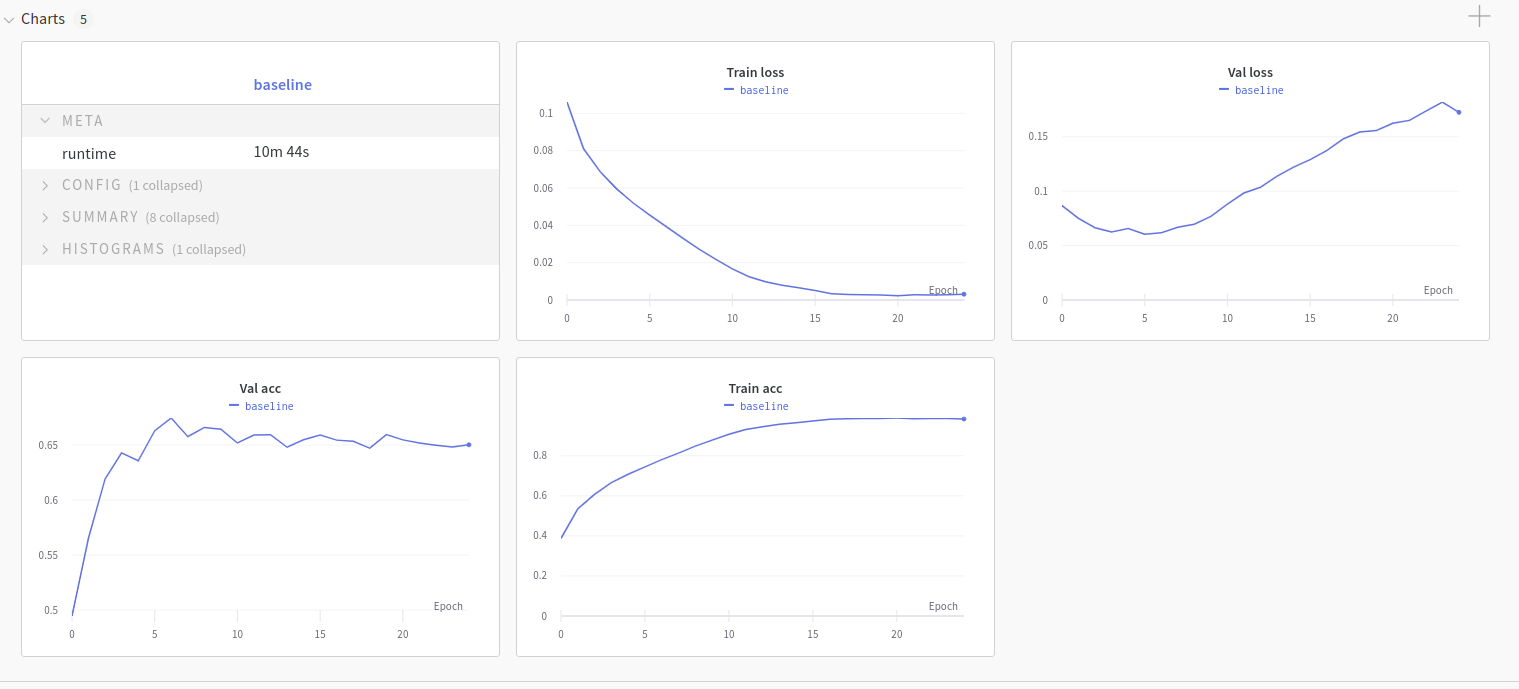

## –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–µ—Ç–∏

–î–ª—è –∑–∞–ø—É—Å–∫–∞ –∏–∑ –∫–æ–ª–∞–±–∞ –∑–∞–≥—Ä—É–∑–∏—Ç–µ –≤ —Å–≤–æ–π google drive —Ñ–∞–π–ª filter_viz.py –∏ –∑–∞–ø—É—Å—Ç–∏—Ç–µ —è—á–µ–π–∫–∏ –Ω–∏–∂–µ. –ü—Ä–∏ –∑–∞–ø—É—Å–∫–µ —Å –ª–æ–∫–∞–ª—å–Ω–æ–π –º–∞—à–∏–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –¥–≤–µ —è—á–µ–π–∫–∏ –º–æ–∂–Ω–æ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å.

In [26]:
!wget https://raw.githubusercontent.com/Kirili4ik/iad-deep-learning/premium/2021/sem03/filter_viz.py

--2021-09-30 12:01:53--  https://raw.githubusercontent.com/Kirili4ik/iad-deep-learning/premium/2021/sem03/filter_viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3293 (3.2K) [text/plain]
Saving to: ‚Äòfilter_viz.py‚Äô

filter_viz.py       100%[===================>]   3.22K  --.-KB/s    in 0s      

2021-09-30 12:01:53 (56.5 MB/s) - ‚Äòfilter_viz.py‚Äô saved [3293/3293]



In [27]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [28]:
#import sys
#sys.path.append('/content/gdrive/My Drive')

In [29]:
from filter_viz import plot_filters

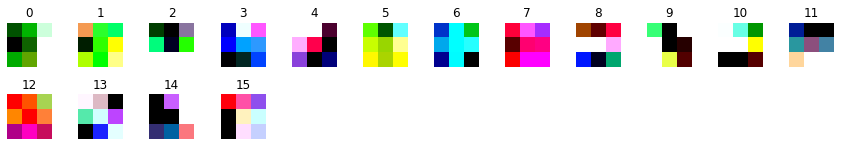

In [30]:
model_baseline.cpu()

plot_filters(model_baseline.conv1, single_channel=False)

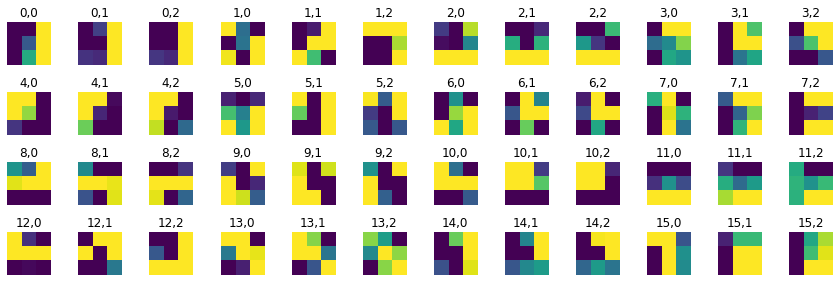

In [31]:
plot_filters(model_baseline.conv1, single_channel=True)

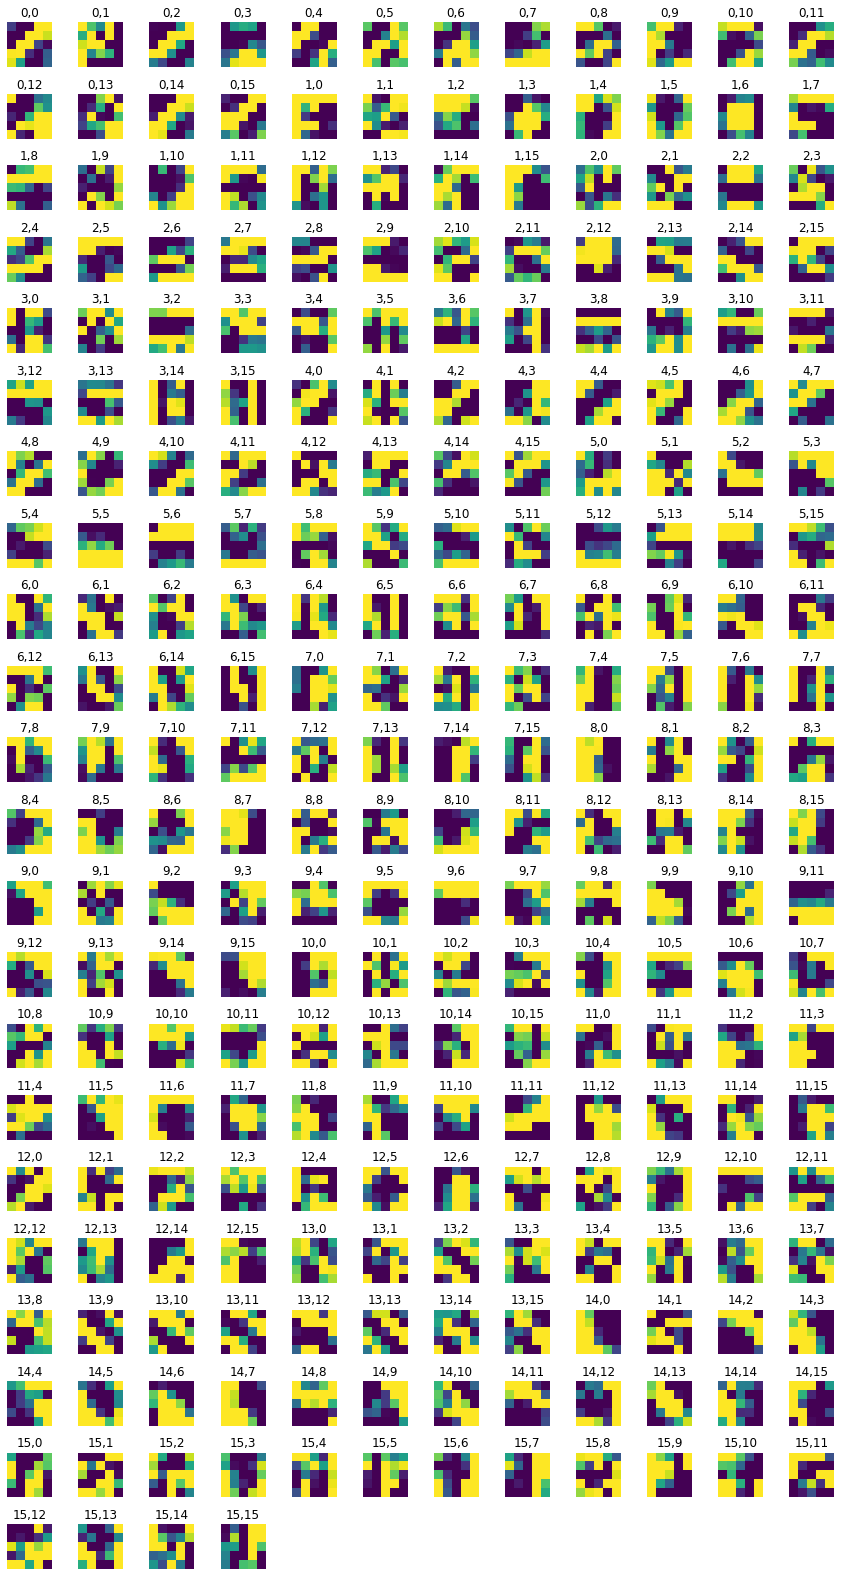

In [32]:
plot_filters(model_baseline.conv2, single_channel=True)

## –ó–∞–¥–∞–Ω–∏–µ:

–ü–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å —Ñ—É–Ω–∫—Ü–∏—è–º–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ —Å–µ—Ç–∏. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –∑–∞–º–µ–Ω–∏—Ç—å ReLU –Ω–∞ LeakyReLU, ELU –∏–ª–∏ SELU. –ö–∞–∫ –∑–∞–º–µ–Ω–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –∏ —Å–∫–æ—Ä–æ—Å—Ç—å —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏?

[–ü–æ—á–∏—Ç–∞—Ç—å –ø—Ä–æ —Ä–∞–∑–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –∑–¥–µ—Å—å](https://mlfromscratch.com/activation-functions-explained/#/)

In [33]:
# self.relu    = nn.LeakyReLU()

# 2. –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è

–ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö - –æ—á–µ–Ω—å –º–æ—â–Ω—ã–π –ø—Ä–æ—Ü–µ—Å—Å, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –° –ø–æ–º–æ—â—å—é –ø–æ–≤–æ—Ä–æ—Ç–æ–≤, –æ—Ç—Ä–∞–∂–µ–Ω–∏—è, –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —à—É–º–∞, —Å–¥–≤–∏–≥–æ–≤ –∏ –¥—Ä—É–≥–∏—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π, –∫–∞—Ä—Ç–∏–Ω–∫–∞ –Ω–µ–º–Ω–æ–≥–æ –º–µ–Ω—è–µ—Ç—Å—è, –æ–¥–Ω–∞–∫–æ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç —Å–≤–æ—é –ø—Ä–µ–∂–Ω—é—é –º–µ—Ç–∫—É. –° –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ Compose –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω—è—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –∞ –ø–æ—Ç–æ–º –ø—Ä–∏–º–µ–Ω—è—Ç—å –∏—Ö –ø—Ä–∏ —á—Ç–µ–Ω–∏–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞. –ü–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–π –¥–æ—Å—Ç—É–ø–µ–Ω [—Ç—É—Ç](https://pytorch.org/vision/stable/transforms.html). –ò–∑—É—á–∏—Ç–µ –µ–≥–æ –∏ –ø–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è–º–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è

In [34]:
import PIL

transform = transforms.Compose(
    [transforms.ColorJitter(hue=.05, saturation=.05),    # –ø–æ–¥–º–µ—à–∏–≤–∞–Ω–∏–µ —Ü–≤–µ—Ç–æ–≤ (—è—Ä–∫–æ—Å—Ç—å, –Ω–∞—Å—ã—â–µ–Ω–Ω–æ—Å—Ç—å –∏ —Ç–¥)
     transforms.RandomHorizontalFlip(p=0.5),             # –ø–æ–≤–æ—Ä–æ—Ç –∫–∞—Ä—Ç–∏–Ω–∫–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ–π –æ—Å–∏ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å 50% 
     transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),     # –ø–æ–≤–æ—Ä–æ—Ç –∫–∞—Ä—Ç–∏–Ω–∫–∏ –Ω–∞ —Å–ª—É—á–∞–π–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ç -20 –¥–æ 20 –≥—Ä–∞–¥—É—Å–æ–≤
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./cifar', train=True,
                                        download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./cifar', train=False,
                                       download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=1)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1231: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


Files already downloaded and verified
Files already downloaded and verified


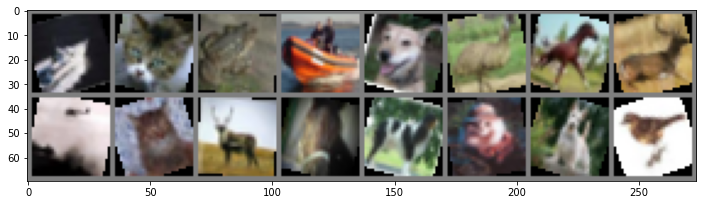

In [35]:
plt.figure(figsize=(12,12))

dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=False)

In [36]:
model_base = ModelBaseline()
model_base.to(device)
wandb.init(project="conv-sem03", name='add augmentations')
wandb.watch(model_baseline)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_base.parameters(), lr=0.001, momentum=0.9)

train(model_base, criterion, optimizer, train_dataloader, test_dataloader)

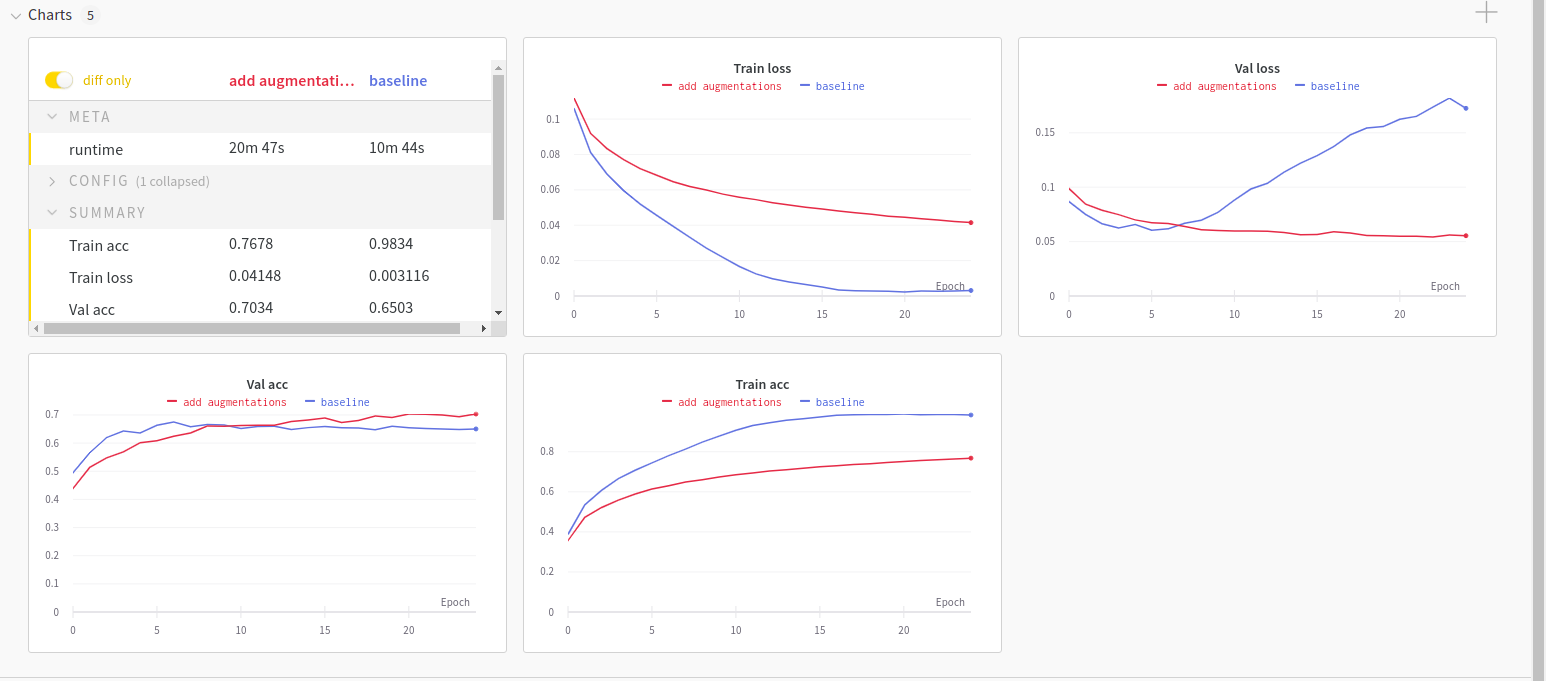

```
–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ:

1) –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è —É–≤–µ–ª–∏—á–∏–ª–æ—Å—å –≤ 2 —Ä–∞–∑–∞

2) Accuracy –Ω–∞ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –≤—ã—Ä–æ—Å–ª–∞ –Ω–∞ 5% (65/70).

```

# 3. –ö–∞–∫ —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏?

–û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å VGG –±–ª–æ–∫–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –ø–æ–≤—ã—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã —Å–µ—Ç–∏ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω—ã—Ö –±–ª–æ–∫–æ–≤. –ü—Ä–∏ —ç—Ç–æ–º —á–∏—Å–ª–æ —Ñ–∏–ª—å—Ç—Ä–æ–≤ –≤ –∫–∞–∂–¥–æ–º –Ω–æ–≤–æ–º –±–ª–æ–∫–µ –≤ –¥–≤–∞ —Ä–∞–∑–∞ –±–æ–ª—å—à–µ, —á–µ–º –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º. –î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å 3 VGG –±–ª–æ–∫–∞.

## **Dropout**

–ï—Å–ª–∏ —Å–µ—Ç—å –∏–º–µ–µ—Ç —Å–ª–æ–∂–Ω—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É, —Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ - –ø—Ä–æ—Ü–µ—Å—Å, –≤ –∫–æ—Ç–æ—Ä–æ–º –º–æ–¥–µ–ª—å —Å–ª–∏—à–∫–æ–º —Å–∏–ª—å–Ω–æ –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç—Å—è –ø–æ–¥ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É –∏ –ø–æ—Ç–æ–º –¥–∞–µ—Ç –∑–∞–Ω–∏–∂–µ–Ω–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π. –î–ª—è –±–æ—Ä—å–±—ã —Å —ç—Ç–∏–º –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Dropout

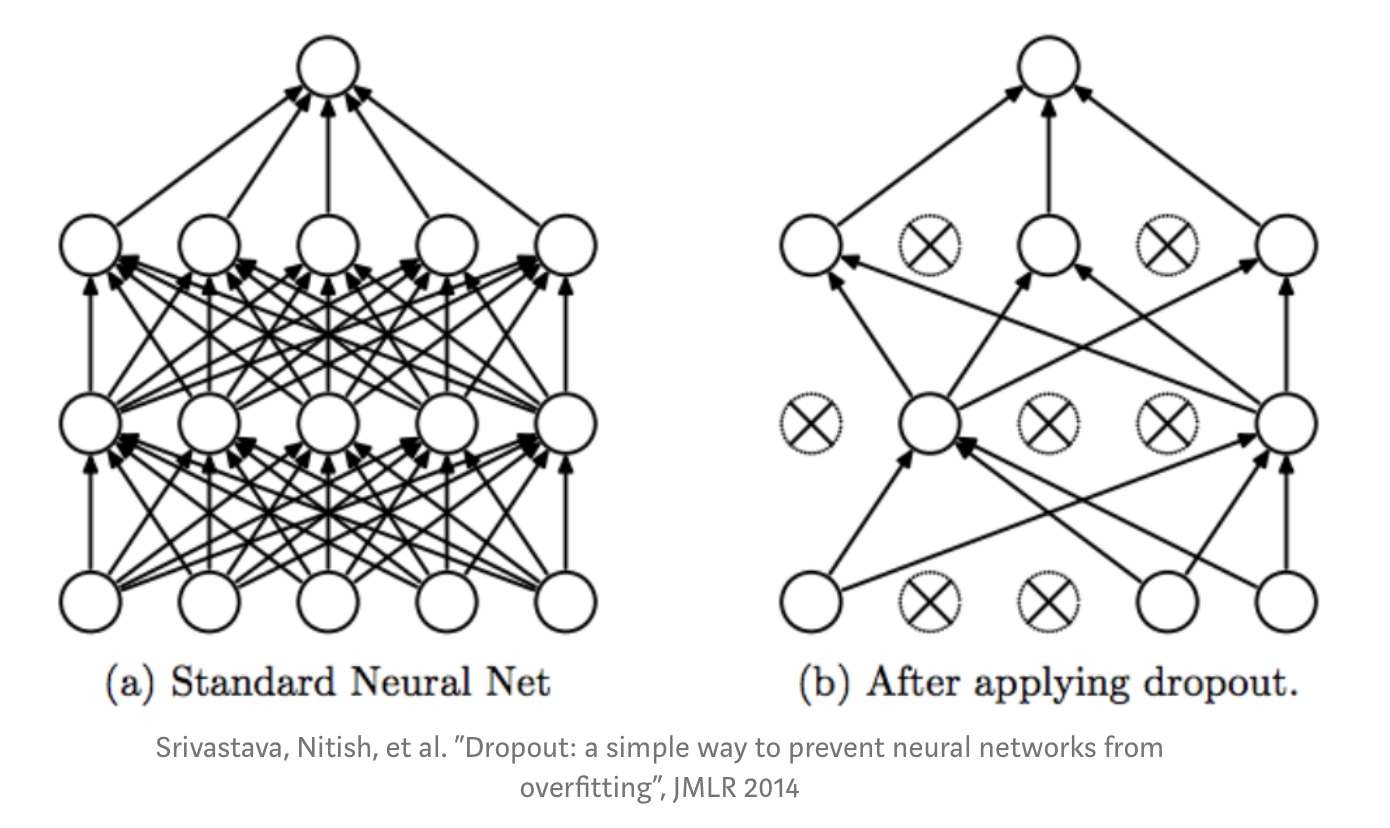

–î–æ–±–∞–≤–∏–º Dropout —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º 0.2 –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ VGG –±–ª–æ–∫–∞ –∏ –ø–æ—Å–ª–µ 1 –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω–æ–≥–æ —Å–ª–æ—è –∏ –µ–≥–æ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏.

–¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –∏ —Å—Ç–∞–±–∏–ª–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è –¥–æ–±–∞–≤–∏–º [BatchNorm](https://habr.com/ru/post/309302///) –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–≥–æ —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–≥–æ —Å–ª–æ—è –∏ –ø–æ—Å–ª–µ 1 –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω–æ–≥–æ —Å–ª–æ—è
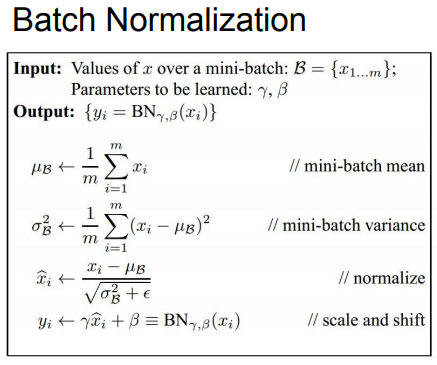


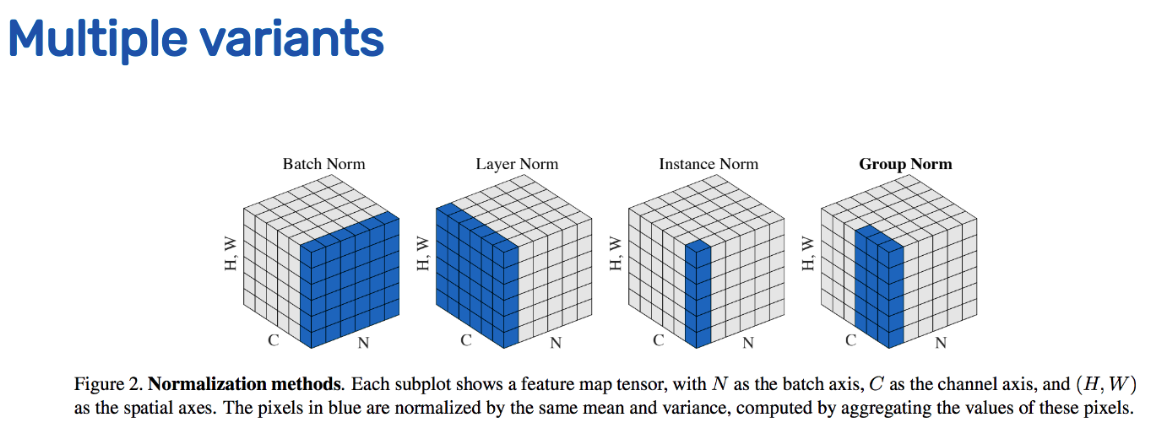

```
–ü–æ –∫–∞—Ä—Ç–∏–Ω–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è BatchNorm –Ω–∞–º –Ω–∞–¥–æ –∑–Ω–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–Ω–∞–ª–æ–≤ C. –ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ BatchNorm (–æ—á–µ–Ω—å —É–ø—Ä–æ—â–∞—è) —É—Å—Ä–µ–¥–Ω—è–µ—Ç –ø–æ –±–∞—Ç—á—É, –∞ —Ç–∞–∫–∏—Ö (~)—É—Å—Ä–µ–¥–Ω–µ–Ω–∏–π –Ω–∞–¥–æ —Å–¥–µ–ª–∞—Ç—å C —à—Ç—É–∫.

```

### –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏:

**1)** –ü—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏ –≤—Å–µ–≥–¥–∞ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ BatchNorm

**2)** –ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ BatchNorm –±–µ—Ä–∏—Ç–µ –ø–æ–±–æ–ª—å—à–µ –±–∞—Ç—á—Å–∞–π–∑; –í–Ω–∞—á–∞–ª–µ –æ–±—É—á–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –º–µ–¥–ª–µ–Ω–Ω—ã–º; –ù–µ –∑–∞–±—ã–≤–∞–π—Ç–µ model.train() –∏ model.eval() —Ç.–∫. BN –∏ Dropout —Ä–∞–±–æ—Ç–∞—é—Ç –ø–æ —Ä–∞–∑–Ω–æ–º—É –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∏ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞(—Ç–µ—Å—Ç–∞).

In [37]:
model = nn.Sequential(
    nn.Conv2d(3, 16, 3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 16, 3, padding=1),
    nn.BatchNorm2d(16),              # 16 is the number of channels
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Conv2d(16, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Conv2d(32, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Flatten(),
    nn.Linear(64 * 4 * 4, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10),
    nn.Softmax()
)

In [38]:
model.to(device)

wandb.init(project="conv-sem03", name='+augs +BatchNorm + Dropout')
wandb.watch(model)

[]

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train(model, criterion, optimizer, train_dataloader, test_dataloader)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


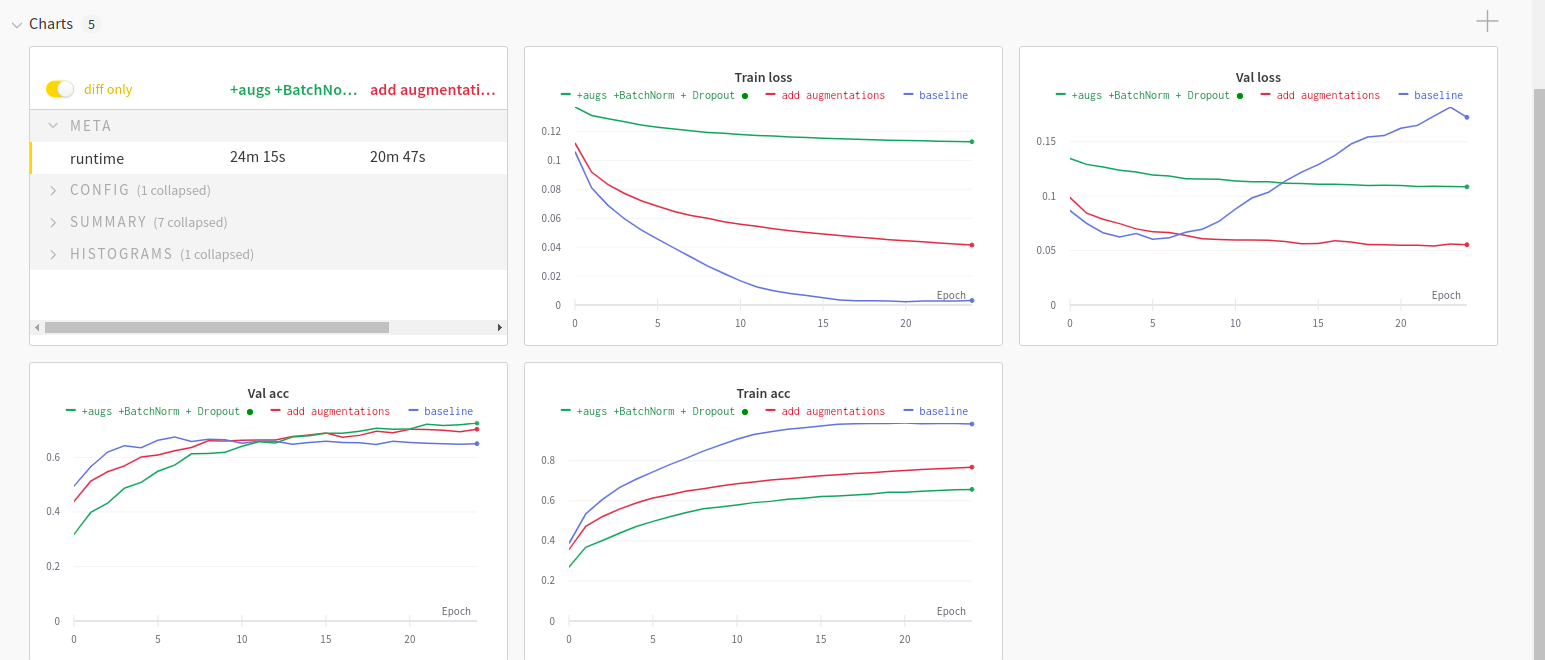

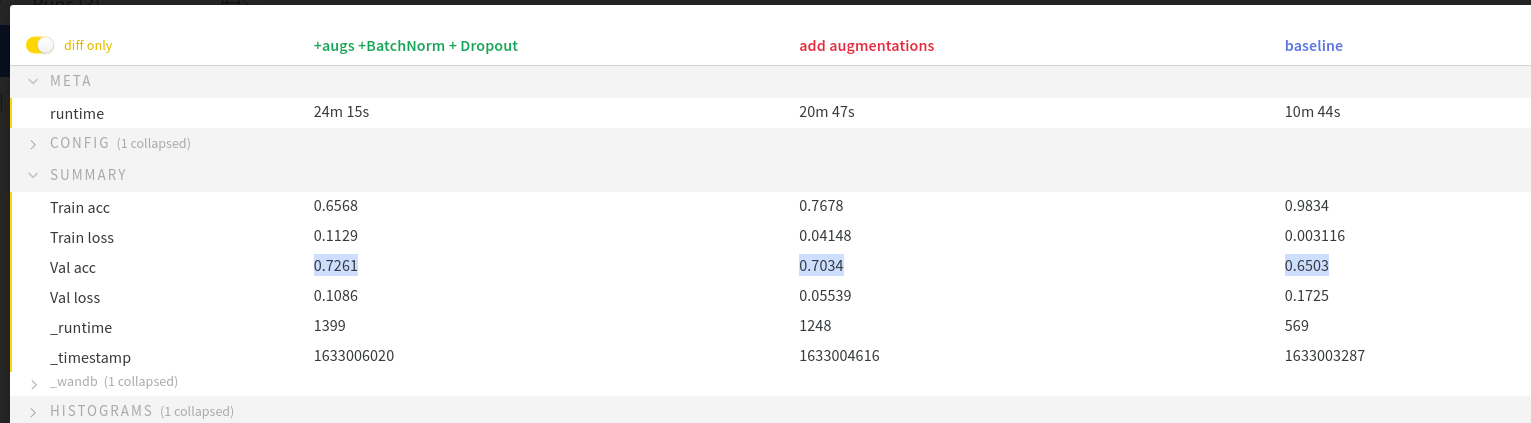

```

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ:

1) –ú—ã —É–≤–µ–ª–∏—á–∏–ª–∏ accuracy –Ω–∞ ~10%

2) –ö–∞–∂–¥—ã–π –≤ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏ –≥—Ä–∞—Ñ–∏–∫ –≤—ã–≥–ª—è–¥–∏—Ç –ø–æ —Ä–∞–∑–Ω–æ–º—É - –ø–æ—ç—Ç–æ–º—É –≤–∞–∂–Ω–æ –ª–æ–≥–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ!

```